In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Business Problem

The dairy business wants to forecast future monthly milk production in order to:

Plan supply chain and distribution

Manage inventory and cold storage

Optimize workforce and operational scheduling

Handle seasonal fluctuations

Support strategic production planning

In [2]:
# load the data set 
data = pd.read_csv('/DataScienceNotes/Assignments/20-RNN/monthly_milk_production.csv')

### Exploratory Data Analysis (EDA) 

In [3]:
data.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [4]:
# making date column as proper Date and set as index 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [6]:
# checking for missing values
data.isna().sum()

Production    0
dtype: int64

No missing values 

it's a continuous montly data

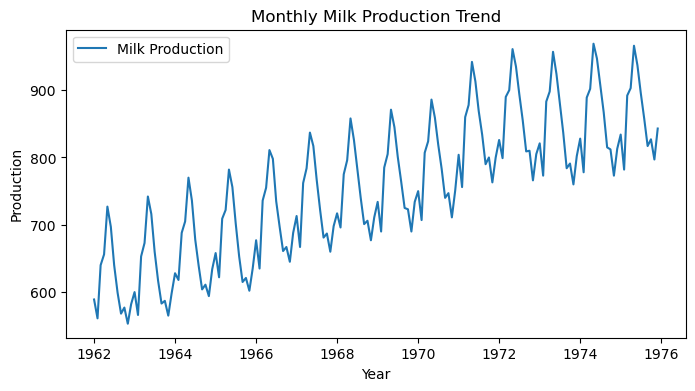

In [7]:
# visulizing trend and seasonality
plt.figure(figsize= (8, 4))
plt.plot(data, label='Milk Production')
plt.title('Monthly Milk Production Trend')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()

Clear upward trend

Strong seasonality (yearly cycles)

### Data Preparation for Deep Learning 

In [8]:
# scaling the data as neural network requires normalize inputs
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [9]:
# creating the time series sequence 
# using 12 months window to predict the next month
def create_sequences(data, window_size=12):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, 12)

In [10]:
# spliting the data as train validation and test
train_size = int(len(X)*0.7)
val_size = int(len(X)*0.15)
X_train, y_train = X[:train_size], y[:train_size]
X_val ,y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

### Model Building 

In [11]:
# building amodel using comman parameter such as
# Loss-mean squared error, Optimizer-Adam, Epochs-50, Batch size-16
# building a basic RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

#### RNN Model

In [12]:
# SimpleRnn model
rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(12, 1)),
    Dense(1)
])

In [13]:
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0488 - val_loss: 0.0207
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0173 - val_loss: 0.0263
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0089 - val_loss: 0.0079
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0079 - val_loss: 0.0189
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038 - val_loss: 0.0093
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033 - val_loss: 0.0052
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0028 - val_loss: 0.0066
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025 - val_loss: 0.0052
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025 - val_loss: 0.0038
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024 - val_loss: 0.0045


In [14]:
rnn_pred = rnn_model.predict(X_test) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


In [15]:
# Evaluating all the models at the end by defing a single function

#### LSTM Model

In [16]:
# building LSTM Model
from tensorflow.keras.layers import LSTM

In [17]:
# Lstm model
lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(12, 1)),
    Dense(1)
])

In [18]:
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0943 - val_loss: 0.0619
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0284 - val_loss: 0.0409
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0315 - val_loss: 0.0252
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0238 - val_loss: 0.0364
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0246 - val_loss: 0.0315
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0230 - val_loss: 0.0251
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0229 - val_loss: 0.0247
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0224 - val_loss: 0.0257
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0223 - val_loss: 0.0251
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0217 - val_loss: 0.0248
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0219 - val_loss: 0.0254
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0217 - val_loss: 0.0227


In [19]:
lstm_pred = lstm_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


#### GRU Model

In [20]:
# build GRU model
from tensorflow.keras.layers import GRU

In [21]:
gru_model = Sequential([
    GRU(50, activation='tanh', input_shape=(12,1)),
    Dense(1)
])

In [22]:
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.1087 - val_loss: 0.1268
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0326 - val_loss: 0.0239
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0308 - val_loss: 0.0226
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0255 - val_loss: 0.0339
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0221 - val_loss: 0.0427
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0223 - val_loss: 0.0358
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0208 - val_loss: 0.0280
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0202 - val_loss: 0.0268
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0197 - val_loss: 0.0266
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0194 - val_loss: 0.0254
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0188 - val_loss: 0.0265
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0185 - val_loss: 0.0271


In [23]:
gru_pred = gru_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


In [24]:
# doing Inverse scaling
y_test_inv = scaler.inverse_transform(y_test)
rnn_pred_inv = scaler.inverse_transform(rnn_pred)
lstm_pred_inv = scaler.inverse_transform(lstm_pred)
gru_pred_inv = scaler.inverse_transform(gru_pred)

### Model Evaluation 

In [25]:
# evaluating the mse mase and mape for all the models 
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
# defining a function to find all the model valuation
def metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs(y_true - y_pred/y_true))*100
    return rmse, mae, mape

In [27]:
print("RNN Model:", metrics(y_test_inv, rnn_pred_inv))
print("LSTM Model:", metrics(y_test_inv, lstm_pred_inv))
print("GRU Model:", metrics(y_test_inv, gru_pred_inv))

RNN Model: (18.425906533167037, 15.133720397949219, 85955.1999009726)
LSTM Model: (29.27538599017415, 25.166109720865876, 85954.75635971555)
GRU Model: (38.94395820780616, 29.32086435953775, 85952.48593180453)


by looking at the above values the LSTM model performing well 

### Prediction and Visualization 

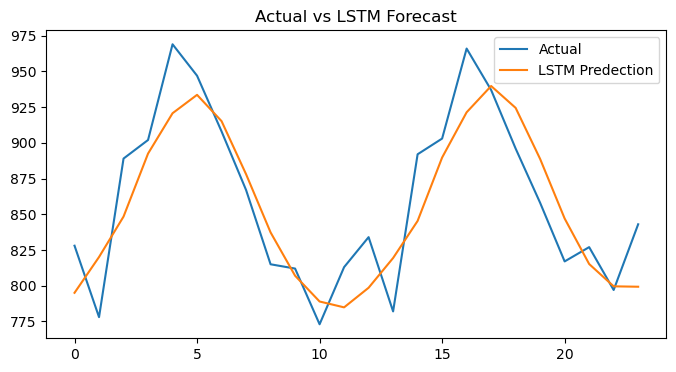

In [28]:
# visualizing the actual and predicated plot 
plt.figure(figsize=(8, 4))
plt.plot(y_test_inv, label='Actual')
plt.plot(lstm_pred_inv, label='LSTM Predection')
plt.title('Actual vs LSTM Forecast')
plt.legend()
plt.show()

Good alignment LSTM is effective for time-series forecasting

Lagging prediction, Model reacts slightly late 

Smoother predictions, LSTM averages out noise

In [29]:
# finding forecast of next 12 months
future_input = scaled_data[-12:]
future_prediction = []
for _ in range(12):
    pred = lstm_model.predict(future_input.reshape(1,12,1))
    future_prediction.append(pred[0,0])
    future_input = np.append(future_input[1:], pred, axis=0)

future_prediction = scaler.inverse_transform(np.array(future_prediction).reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


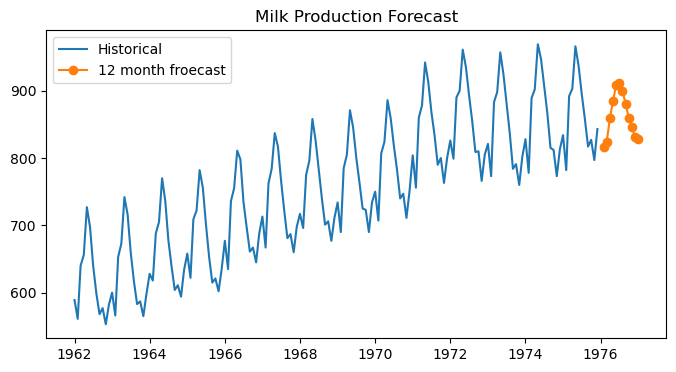

In [30]:
# visualizing the future forecast
future_dates = pd.date_range(data.index[-1], periods=13, freq='M',)[1:]
plt.figure(figsize=(8,4))
plt.plot(data.index, data['Production'], label='Historical')
plt.plot(future_dates, future_prediction, label='12 month froecast', marker='o')
plt.title('Milk Production Forecast')
plt.legend()
plt.show()

### Business Insights 

LSTM & GRU outperform Basic RNN due to better memory handling

Strong seasonal patterns captured effectively

Forecast provides early visibility of production trends

Recommendations

Adjust cold storage capacity in advance

Workforce Management: Schedule labor based on forecasted peaks

Supply Chain Optimization: Align transportation with production cycles